In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from fuzzywuzzy import fuzz,process
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import re
import os
pd.set_option('display.max_rows', None)

In [2]:
# !pip install fuzzywuzzy

In [6]:
#read dataframe
df = pd.read_csv('C:/Users/Corporate/Documents/ovi/RAW DATA TERBARU/bearing.csv')
df.head()

,kode_item,nama_item,part_number,jenis_item,kategori_item,status,updated_at,sbu,item_id,sub_cluster,...,_processed_at,ref_id,REF.nama_item,REF.part_number,REF.coarse_spec,REF.jenis_item,REF.kategori_item,REF.status,REF.sub_cluster,_score
0,SPT.P2.NS.00004510,BEARING SKF 6010 2Z,BEARING SKF 6010 2Z,Stock,SPAREPART,Active,2023-05-24 04:07:28,IPG,IPG-SPT.P2.NS.00004510,BEARING,...,2023-09-20 03:31:37.568184+00:00,IT-629,BEARING 6010 ZZ,NaN,6010,Stock,SPAREPART,Active,BEARING,100.0
1,MS01175,"BEARING ,30218 J2",NaN,Stock,SPAREPART,Active,2015-01-17 10:17:12,ISP,ISP-MS01175,BEARING,...,2023-09-20 03:31:32.659748+00:00,IT-630,BEARING 30218 J2,NaN,30218 J2,Stock,SPAREPART,Active,BEARING,100.0
2,610504000106,Bearing Type 6307,NaN,Stock,SPAREPART,Active,2023-04-13 09:21:24,IRP,IRP-610504000106,BEARING,...,2023-09-20 03:31:32.659748+00:00,IT-631,BEARING 6307,NaN,6307,Stock,SPAREPART,Active,BEARING,100.0
3,MS01055,BEARING 6307,NaN,Stock,SPAREPART,Active,2019-10-22 08:01:07,ISP,ISP-MS01055,BEARING,...,2023-09-20 03:31:32.659748+00:00,IT-631,BEARING 6307,NaN,6307,Stock,SPAREPART,Active,BEARING,100.0
4,GAS.GA.LL.00000108,BEARING 6307,NaN,Stock,GENERAL SUPPLIES,Active,2020-09-09 02:33:46,IPG,IPG-GAS.GA.LL.00000108,BEARING,...,2023-09-20 03:31:32.659748+00:00,IT-631,BEARING 6307,NaN,6307,Stock,SPAREPART,Active,BEARING,100.0


In [7]:
#show info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kode_item          1287 non-null   object 
 1   nama_item          1287 non-null   object 
 2   part_number        581 non-null    object 
 3   jenis_item         1287 non-null   object 
 4   kategori_item      1287 non-null   object 
 5   status             1287 non-null   object 
 6   updated_at         1287 non-null   object 
 7   sbu                1287 non-null   object 
 8   item_id            1287 non-null   object 
 9   sub_cluster        1287 non-null   object 
 10  part_number_clean  211 non-null    object 
 11  nama_item_clean    1287 non-null   object 
 12  coarse_spec        1214 non-null   object 
 13  _rownum            1287 non-null   int64  
 14  _processed_at      1277 non-null   object 
 15  ref_id             1277 non-null   object 
 16  REF.nama_item      1277 

In [8]:
#show size dataframe
df.shape

(1287, 24)

In [29]:
#filtering dataframe
# df['nama_item'] = df['nama_item'].str.upper()

# word_to_find = 'iko'

# df[df['nama_item'].str.contains(word_to_find, case=False, regex=True)]

In [9]:
# # Konversi teks menjadi vektor fitur menggunakan TF-IDF
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(df['nama_item_new'])

# # Metode Elbow: Mencari nilai inertia untuk berbagai n_clusters
# inertia_values = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)
#     inertia_values.append(kmeans.inertia_)

# # Plot Elbow Method
# plt.plot(range(1, 11), inertia_values, marker='o')
# plt.xlabel('Jumlah Klaster (n_clusters)')
# plt.ylabel('Inertia')
# plt.title('Metode Elbow untuk Menemukan Jumlah Klaster yang Tepat')
# plt.show()

# # Metode Silhouette Score: Mencari nilai Silhouette Score untuk berbagai n_clusters
# silhouette_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)
#     labels = kmeans.labels_
#     silhouette_scores.append(silhouette_score(X, labels))

# # Plot Silhouette Score
# plt.plot(range(2, 11), silhouette_scores, marker='o')
# plt.xlabel('Jumlah Klaster (n_clusters)')
# plt.ylabel('Silhouette Score')
# plt.title('Metode Silhouette Score untuk Menemukan Jumlah Klaster yang Tepat')
# plt.show()

# best_k = 2 + np.argmax(silhouette_scores)
# print(f"The best value of K (number of clusters) based on the Silhouette Score is: {best_k}")


In [11]:
# #show the best K
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(df['nama_item_new'])
# # Metode Elbow: Mencari nilai inertia untuk berbagai n_clusters
# inertia_values = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)
#     inertia_values.append(kmeans.inertia_)

# # Plot Elbow Method
# plt.plot(range(1, 11), inertia_values, marker='o')
# plt.xlabel('Jumlah Klaster (n_clusters)')
# plt.ylabel('Inertia')
# plt.title('Metode Elbow untuk Menemukan Jumlah Klaster yang Tepat')
# plt.show()

# # Find the best K based on the Elbow method
# best_k = None
# for i in range(1, len(inertia_values) - 1):
#     diff1 = inertia_values[i] - inertia_values[i - 1]
#     diff2 = inertia_values[i + 1] - inertia_values[i]
#     if diff1 / diff2 < 0.2:
#         best_k = i + 1
#         break

# print(f"The best value of K (number of clusters) based on the Elbow method is: {best_k}")

In [12]:
# # Metode Silhouette Score: Mencari nilai Silhouette Score untuk berbagai n_clusters
# silhouette_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)
#     labels = kmeans.labels_
#     silhouette_scores.append(silhouette_score(X, labels))

# # Plot Silhouette Score
# plt.plot(range(2, 11), silhouette_scores, marker='o')
# plt.xlabel('Jumlah Klaster (n_clusters)')
# plt.ylabel('Silhouette Score')
# plt.title('Metode Silhouette Score untuk Menemukan Jumlah Klaster yang Tepat')
# plt.show()

# best_k = 2 + np.argmax(silhouette_scores)
# print(f"The best value of K (number of clusters) based on the Silhouette Score is: {best_k}")

In [14]:
df2 = df.dropna(subset=['REF.nama_item'])

In [16]:
df2.head()

,kode_item,nama_item,part_number,jenis_item,kategori_item,status,updated_at,sbu,item_id,sub_cluster,...,ref_id,REF.nama_item,REF.part_number,REF.coarse_spec,REF.jenis_item,REF.kategori_item,REF.status,REF.sub_cluster,_score,agg_cluster_label_after
0,SPT.P2.NS.00004510,BEARING SKF 6010 2Z,BEARING SKF 6010 2Z,Stock,SPAREPART,Active,2023-05-24 04:07:28,IPG,IPG-SPT.P2.NS.00004510,BEARING,...,IT-629,BEARING 6010 ZZ,NaN,6010,Stock,SPAREPART,Active,BEARING,100.0,51
1,MS01175,"BEARING ,30218 J2",NaN,Stock,SPAREPART,Active,2015-01-17 10:17:12,ISP,ISP-MS01175,BEARING,...,IT-630,BEARING 30218 J2,NaN,30218 J2,Stock,SPAREPART,Active,BEARING,100.0,104
2,610504000106,Bearing Type 6307,NaN,Stock,SPAREPART,Active,2023-04-13 09:21:24,IRP,IRP-610504000106,BEARING,...,IT-631,BEARING 6307,NaN,6307,Stock,SPAREPART,Active,BEARING,100.0,637
3,MS01055,BEARING 6307,NaN,Stock,SPAREPART,Active,2019-10-22 08:01:07,ISP,ISP-MS01055,BEARING,...,IT-631,BEARING 6307,NaN,6307,Stock,SPAREPART,Active,BEARING,100.0,637
4,GAS.GA.LL.00000108,BEARING 6307,NaN,Stock,GENERAL SUPPLIES,Active,2020-09-09 02:33:46,IPG,IPG-GAS.GA.LL.00000108,BEARING,...,IT-631,BEARING 6307,NaN,6307,Stock,SPAREPART,Active,BEARING,100.0,637


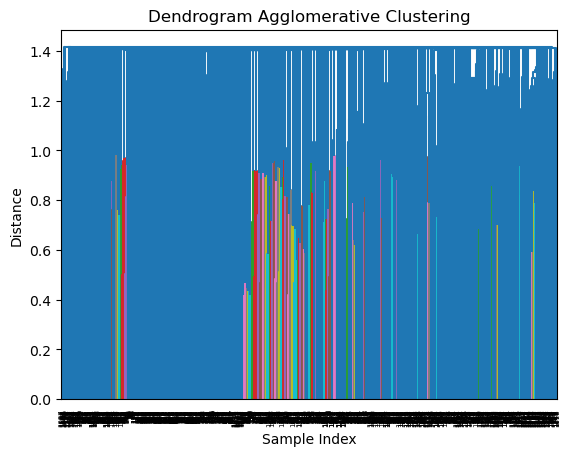

Jumlah klaster berdasarkan dendrogram: 802


In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Konversi teks menjadi vektor fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df2['REF.nama_item'])

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg_clustering.fit(X.toarray())

# Visualisasi dendrogram
linked = linkage(X.toarray(), method='complete', metric='euclidean')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Dapatkan jumlah klaster berdasarkan dendrogram
max_d = 1.0  # Ambil nilai distance maksimum untuk membatasi jumlah klaster
n_clusters = sum(d > max_d for d in linked[:, 2]) + 1
print(f"Jumlah klaster berdasarkan dendrogram: {n_clusters}")

### AGGLOMERATIVE CLUSTERING

In [19]:
# filtered_df['angka'] = filtered_df['nama_item'].str.replace(r'\D', '', regex=True)

# Calculate the similarity matrix using fuzzywuzzy
similarity_matrix = pd.DataFrame(index=df2['REF.nama_item'], columns=df2['REF.nama_item'])
for i in df2['REF.nama_item']:
    for j in df2['REF.nama_item']:
        ratio = fuzz.ratio(i, j)
        similarity_matrix.loc[i, j] = ratio

# Convert similarity matrix to numeric values
similarity_matrix = similarity_matrix.astype(float)

# Scale the similarity matrix
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(similarity_matrix)

# Perform DBSCAN clustering
# Agglomerative Clustering
# Pilih jumlah klaster yang diinginkan (n_clusters)
n_clusters = 802
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(scaled_matrix)

# Assign cluster labels to the DataFrame
df2['agg_cluster_label_REF.nama_item'] = cluster_labels

# Print the clustering results
# print(df[['nama_item', 'agg_cluster_label']])

C:\Users\Corporate\AppData\Local\Temp\ipykernel_8016\3998093085.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['agg_cluster_label_REF.nama_item'] = cluster_labels


In [54]:
h =(s).value_counts()
h

1    170
2     19
3      1
Name: agg_cluster_label_after, dtype: int64

In [56]:
# Filter DataFrame untuk baris dengan 'nama' yang tidak duplikat
# df_non_duplicates = df.drop_duplicates(subset='agg_cluster_label_after', keep=False)

#filter df lagi untuk kedua 
df_non_duplicates2 = df_non_duplicates.drop_duplicates(subset='agg_cluster_label_after', keep=False)

#duplicate_df + df_non_duplicates + df_non_duplicates2 + duplicate_df2

In [22]:
# result = pd.concat([duplicate_df, df_non_duplicates, df_non_duplicates2, duplicate_df2])
# Reset the index
hasil_label_df_non_duplicates2 = df2['agg_cluster_label_REF.nama_item']
df['agg_cluster_label_REF.nama_item'] = hasil_label_df_non_duplicates2

In [21]:
df2.head()

,kode_item,nama_item,part_number,jenis_item,kategori_item,status,updated_at,sbu,item_id,sub_cluster,...,REF.nama_item,REF.part_number,REF.coarse_spec,REF.jenis_item,REF.kategori_item,REF.status,REF.sub_cluster,_score,agg_cluster_label_after,agg_cluster_label_REF.nama_item
0,SPT.P2.NS.00004510,BEARING SKF 6010 2Z,BEARING SKF 6010 2Z,Stock,SPAREPART,Active,2023-05-24 04:07:28,IPG,IPG-SPT.P2.NS.00004510,BEARING,...,BEARING 6010 ZZ,NaN,6010,Stock,SPAREPART,Active,BEARING,100.0,51,63
1,MS01175,"BEARING ,30218 J2",NaN,Stock,SPAREPART,Active,2015-01-17 10:17:12,ISP,ISP-MS01175,BEARING,...,BEARING 30218 J2,NaN,30218 J2,Stock,SPAREPART,Active,BEARING,100.0,104,146
2,610504000106,Bearing Type 6307,NaN,Stock,SPAREPART,Active,2023-04-13 09:21:24,IRP,IRP-610504000106,BEARING,...,BEARING 6307,NaN,6307,Stock,SPAREPART,Active,BEARING,100.0,637,303
3,MS01055,BEARING 6307,NaN,Stock,SPAREPART,Active,2019-10-22 08:01:07,ISP,ISP-MS01055,BEARING,...,BEARING 6307,NaN,6307,Stock,SPAREPART,Active,BEARING,100.0,637,303
4,GAS.GA.LL.00000108,BEARING 6307,NaN,Stock,GENERAL SUPPLIES,Active,2020-09-09 02:33:46,IPG,IPG-GAS.GA.LL.00000108,BEARING,...,BEARING 6307,NaN,6307,Stock,SPAREPART,Active,BEARING,100.0,637,303


In [60]:
# Filter DataFrame for duplicate rows based on 'name' column
# duplicate_df = df[df.duplicated(subset='agg_cluster_label_after', keep=False)]
duplicate_df2 = df[df.duplicated(subset='agg_cluster_label_after', keep=False)]

In [64]:
print(df_non_duplicates2.shape)
print(duplicate_df2.shape)

(170, 21)
(185, 21)


In [94]:
hasil_label_df_non_duplicates2 = df_non_duplicates['agg_cluster_label_after']
df['agg_df_non_duplicates'] = hasil_label_df_non_duplicates2

hasil_label_df_non_duplicates3 = df_non_duplicates2['agg_cluster_label_after']
df['agg_df_non_duplicates3'] = hasil_label_df_non_duplicates3

In [23]:
# df.sort_values(by=['agg_df_non_duplicates3'],ascending=True)
df.to_excel('C:/Users/Corporate/Documents/ovi/RAW DATA TERBARU/bearing_3.xlsx',index=False)

In [21]:
# if df['nama_item'] == 'BEARING SKF 6000-2Z':
#     print(df['nama_item_clean'])

filtered_df = df[df['nama_item'] == 'BEARING SKF 6000-2Z']

# Print the 'nama_item_clean' column for the matching rows
print(filtered_df['nama_item_clean'])

1248    BEARING 6000-ZZ
Name: nama_item_clean, dtype: object


In [107]:
# Mengganti ['kolom1', 'kolom2'] dengan daftar kolom yang ingin Anda tampilkan
x = ['nama_item_clean','ref_id']

# Memfilter DataFrame df berdasarkan kondisi agg_cluster_label_after == 280 dan hanya menampilkan kolom yang dipilih
filtered_df = df_non_duplicates2[df_non_duplicates2['agg_cluster_label_after'] ==4][x]

# Tampilkan hasilnya
print(filtered_df)


    nama_item_clean   ref_id
98    BAUT LONJORAN  IT-2862
100      BAUT OBENG  IT-2827


In [70]:
df_non_duplicates2['agg_cluster_label_after'].value_counts()

6      2
30     2
1      2
3      2
2      2
0      2
5      2
14     2
7      2
4      2
57     1
99     1
40     1
73     1
134    1
56     1
34     1
44     1
53     1
52     1
37     1
47     1
55     1
114    1
65     1
118    1
21     1
85     1
48     1
141    1
45     1
133    1
107    1
80     1
70     1
78     1
42     1
69     1
151    1
150    1
75     1
54     1
35     1
135    1
58     1
12     1
32     1
74     1
60     1
16     1
36     1
22     1
29     1
17     1
31     1
19     1
15     1
61     1
8      1
10     1
13     1
20     1
59     1
33     1
39     1
28     1
79     1
26     1
27     1
62     1
64     1
38     1
46     1
23     1
41     1
49     1
25     1
18     1
24     1
123    1
11     1
66     1
120    1
126    1
98     1
124    1
155    1
144    1
68     1
145    1
88     1
43     1
157    1
146    1
92     1
105    1
156    1
106    1
96     1
77     1
110    1
91     1
97     1
103    1
122    1
152    1
117    1
137    1
102    1
119    1
116    1
8

In [97]:
df.to_excel('C:/Users/Corporate/Documents/ovi/RAW DATA TERBARU/mixed3.xlsx',index=False)

### DBSCAN CLUSTERING

In [50]:
#read dataframe
death = pd.read_excel('C:/Users/Corporate/Documents/ovi/RAW DATA TERBARU/baut_mur_35_v9_DYNABOLT.xlsx')


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Corporate/Documents/ovi/RAW DATA TERBARU/baut_mur_35_v9_DYNABOLT.xlsx'

In [20]:
#show info dataframe
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sbu              611 non-null    object
 1   nama_item_clean  611 non-null    object
 2   ref_id           611 non-null    object
 3   S1               611 non-null    object
 4   S2               611 non-null    object
 5   S3               611 non-null    object
 6   S4               608 non-null    object
 7   S5               586 non-null    object
 8   S6               62 non-null     object
 9   S7               27 non-null     object
 10  nama_item_new    611 non-null    object
dtypes: object(11)
memory usage: 52.6+ KB


In [167]:
#show size dataframe
death.shape

(1103, 7)

In [139]:
# show value_counts
# S =death['dbscan_cluster_label'].value_counts()

In [160]:
# death2 = death.drop_duplicates(subset=['nama_item'])

In [169]:
def move_needle_to_front(row):
    choices = row.split()
    needle_match = process.extractOne("NEEDLE", choices, scorer=fuzz.ratio)
    if needle_match and needle_match[1] > 70:
        choices.remove(needle_match[0])
        choices.insert(0, needle_match[0])
        return ' '.join(choices)
    else:
        return row
death['nama_item'] = death['nama_item'].apply(move_needle_to_front)


In [80]:
# death[death['dbscan_cluster_label'] == 15]


In [25]:
filtered_df2.head()

,sbu,kode_item,nama_item,jenis_item,kategori_item,angka,cluster_label
0,ISP,CS05033,W.207-378 BEARING 11309PV,Stock,Sparepart,20737811309,-1
1,ISP,MS01011,"BALL BEARING ,1509X1 1/2",Stock,Sparepart,1509112,-1
2,ISP,MS01017,"BEARING UNIT ,UCP.315-3",Stock,Sparepart,3153,-1
3,ISP,MS01019,"RUMAH BEARING ,SNH.515-612",Stock,Sparepart,515612,-1
4,IPG,SPT.P5.MT.00000104,BALL BEARING NTN32217,Stock,SPAREPART,32217,-1


In [21]:
# df['nama_item_new'] = filtered_df2['nama_item'].str.replace(r'\D', '', regex=True)

# Calculate the similarity matrix using fuzzywuzzy
similarity_matrix = pd.DataFrame(index=df['nama_item_new'] , columns=df['nama_item_new'] )
for i in df['nama_item_new'] :
    for j in df['nama_item_new'] :
        ratio = fuzz.token_set_ratio(i, j)
        similarity_matrix.loc[i, j] = ratio

# Convert similarity matrix to numeric values
similarity_matrix = similarity_matrix.astype(float)

# Scale the similarity matrix
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(similarity_matrix)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='euclidean')
dbscan.fit(scaled_matrix)

# Assign cluster labels to the DataFrame
df['dbscan_cluster_label'] = dbscan.labels_

# Print the clustering results
# print(df[[ 'dbscan_cluster_label']])

In [239]:
result_df[result_df['dbscan_cluster_label'] == 9]

,ref_id,nama_item,part_number,coarse_spec,jenis_item,kategori_item,status,dbscan_cluster_label


In [24]:
df.to_excel('C:/Users/Corporate/Documents/ovi/RAW DATA TERBARU/baut_mur_31_v9_baut_L.xlsx',index=False)

In [207]:
# #remove row similarity

# threshold = 80  # Anda dapat menyesuaikan ambang batas ini sesuai dengan kebutuhan

# # Buat daftar indeks baris yang akan dihapus
# rows_to_remove = []

# # Iterasi melalui DataFrame untuk mencari baris yang mirip
# for i in range(len(filtered_df)):
#     for j in range(i+1, len(filtered_df)):
#         similarity_score = fuzz.token_sort_ratio(filtered_df.iloc[i]['nama_item'], filtered_df.iloc[j]['nama_item'])
#         if similarity_score >= threshold:
#             rows_to_remove.append(j)

# # Hapus baris-baris yang mirip
# df_filtered = filtered_df.drop(rows_to_remove)

In [213]:
filtered_df = death[death['dbscan_cluster_label'].isin(value_counts[value_counts == 2].index)]
filtered_df.sort_values(by=['dbscan_cluster_label'])

,ref_id,nama_item,part_number,coarse_spec,jenis_item,kategori_item,status,dbscan_cluster_label
25,IT-973,BEARING 6307-2RSI,NaN,6307-2RSI,Stock,SPAREPART,Active,0
305,IT-682,BEARING 6307 2RSI,B 01.008,6307 2RSI,Stock,SPAREPART,Active,0
175,IT-816,BEARING 6205 ZZ,NaN,6205,Stock,SPAREPART,Active,1
926,IT-1184,BEARING 6205-ZZ,B 01.002,6205-ZZ,Stock,SPAREPART,Active,1
247,IT-742,BEARING 6308 ZZ,NaN,6308,Stock,SPAREPART,Active,2
533,IT-1621,BEARING 6308-ZZ,NaN,6308-ZZ,Stock,SPAREPART,Active,2
248,IT-741,BEARING 6305 ZZ,BE P,6305,Stock,SPAREPART,Active,3
775,IT-1356,BEARING 6305-ZZ,B 01.013,6305-ZZ,Stock,SPAREPART,Active,3
270,IT-718,BEARING 6001 ZZ,NaN,6001,Stock,SPAREPART,Active,4
795,IT-1334,BEARING 6001-ZZ,B 01.011,6001-ZZ,Stock,SPAREPART,Active,4


In [225]:
# Assuming 'filtered_df' is your DataFrame
unique_labels = filtered_df['dbscan_cluster_label'].drop_duplicates()
res = filtered_df[filtered_df['dbscan_cluster_label'].isin(unique_labels)]


In [235]:
res1 = death[death['dbscan_cluster_label']==-1]

In [236]:
result_df = pd.concat([res1,res])
result_df.shape

(1087, 8)

In [234]:
res = res.drop_duplicates(subset=['dbscan_cluster_label'])
res

,ref_id,nama_item,part_number,coarse_spec,jenis_item,kategori_item,status,dbscan_cluster_label
25,IT-973,BEARING 6307-2RSI,NaN,6307-2RSI,Stock,SPAREPART,Active,0
175,IT-816,BEARING 6205 ZZ,NaN,6205,Stock,SPAREPART,Active,1
247,IT-742,BEARING 6308 ZZ,NaN,6308,Stock,SPAREPART,Active,2
248,IT-741,BEARING 6305 ZZ,BE P,6305,Stock,SPAREPART,Active,3
270,IT-718,BEARING 6001 ZZ,NaN,6001,Stock,SPAREPART,Active,4
285,IT-703,BEARING 6002 ZZ,NaN,6002,Stock,SPAREPART,Active,5
301,IT-686,BEARING 6211 ZZ,NaN,6211,Stock,SPAREPART,Active,6
307,IT-680,BEARING 6207 ZZ,NaN,6207,Stock,SPAREPART,Active,7
312,IT-675,NEEDLE BEARING,NaN,NaN,Stock,GENERAL SUPPLIES,Active,8
323,IT-664,BEARING 6309 ZZ C3,NaN,6309 C3,Stock,SPAREPART,Active,9


In [233]:
res['nama_item']=res['nama_item'].str.replace('LM 20 UU LINEAR BUSH BEARING','LINEAR BUSH BEARING LM 20 UU')

In [194]:
value_counts=death['dbscan_cluster_label'].value_counts()
# d = s.value_counts()
# print(d)

In [173]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, dbscan.labels_)
print(f'Silhouette Score: {silhouette_avg}')

ValueError: Found input variables with inconsistent numbers of samples: [1268, 1103]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


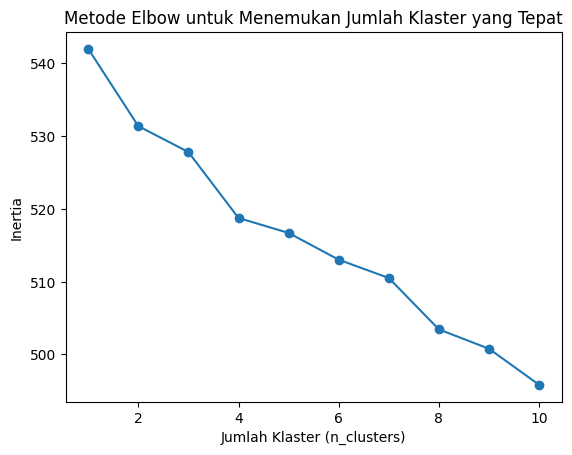

The best value of K (number of clusters) based on the Elbow method is: None


In [27]:
#show the best K


# Konversi teks menjadi vektor fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_df2['nama_item'])

# Metode Elbow: Mencari nilai inertia untuk berbagai n_clusters
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Jumlah Klaster (n_clusters)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menemukan Jumlah Klaster yang Tepat')
plt.show()

# Find the best K based on the Elbow method
best_k = None
for i in range(1, len(inertia_values) - 1):
    diff1 = inertia_values[i] - inertia_values[i - 1]
    diff2 = inertia_values[i + 1] - inertia_values[i]
    if diff1 / diff2 < 0.2:
        best_k = i + 1
        break

print(f"The best value of K (number of clusters) based on the Elbow method is: {best_k}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

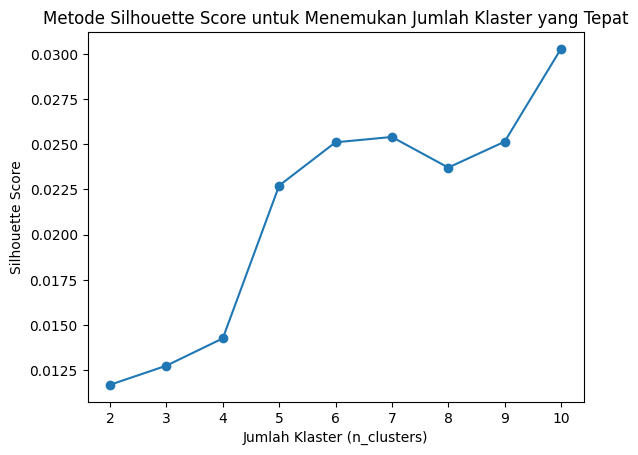

The best value of K (number of clusters) based on the Silhouette Score is: 10


In [28]:
X = vectorizer.fit_transform(filtered_df2['nama_item'])

# Metode Silhouette Score: Mencari nilai Silhouette Score untuk berbagai n_clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Klaster (n_clusters)')
plt.ylabel('Silhouette Score')
plt.title('Metode Silhouette Score untuk Menemukan Jumlah Klaster yang Tepat')
plt.show()

best_k = 2 + np.argmax(silhouette_scores)
print(f"The best value of K (number of clusters) based on the Silhouette Score is: {best_k}")


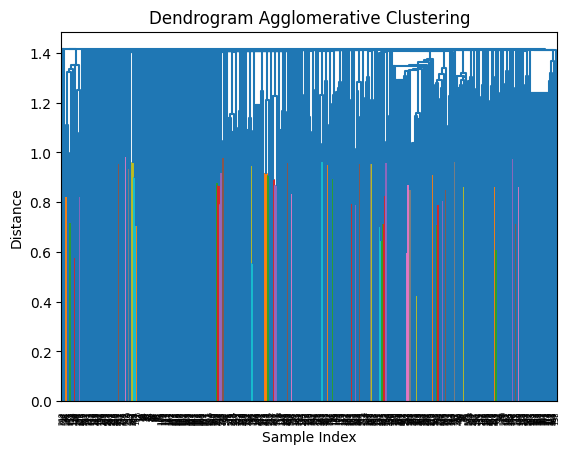

Jumlah klaster berdasarkan dendrogram: 476


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Konversi teks menjadi vektor fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_df2['nama_item'])

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg_clustering.fit(X.toarray())

# Visualisasi dendrogram
linked = linkage(X.toarray(), method='complete', metric='euclidean')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Dapatkan jumlah klaster berdasarkan dendrogram
max_d = 1.0  # Ambil nilai distance maksimum untuk membatasi jumlah klaster
n_clusters = sum(d > max_d for d in linked[:, 2]) + 1
print(f"Jumlah klaster berdasarkan dendrogram: {n_clusters}")

In [31]:
# filtered_df['angka'] = filtered_df['nama_item'].str.replace(r'\D', '', regex=True)

# Calculate the similarity matrix using fuzzywuzzy
similarity_matrix = pd.DataFrame(index=filtered_df2['nama_item'], columns=filtered_df2['nama_item'])
for i in filtered_df2['nama_item']:
    for j in filtered_df2['nama_item']:
        ratio = fuzz.token_set_ratio(i, j)
        similarity_matrix.loc[i, j] = ratio

# Convert similarity matrix to numeric values
similarity_matrix = similarity_matrix.astype(float)

# Scale the similarity matrix
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(similarity_matrix)

# Perform DBSCAN clustering
# Agglomerative Clustering
# Pilih jumlah klaster yang diinginkan (n_clusters)
n_clusters = 476
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(scaled_matrix)

# Assign cluster labels to the DataFrame
filtered_df2['agg_cluster_label'] = cluster_labels

# Print the clustering results
print(filtered_df2[['nama_item', 'agg_cluster_label']])

                                    nama_item  agg_cluster_label
201                           BEARING FL695ZZ                262
537               BEARING            ,NA 4824                  6
445                           BEARING 6008-2Z                341
450                           BEARING SZU6-16                395
531                      BEARING 693 ZZ     ,                399
..                                        ...                ...
217                   GUIDE BEARING SS4-13VZZ                183
242         NYLON WHEEL 5X23X7MM BEARING 625Z                 79
244                INA.NATV.17PPO2/410BEARING                 42
491             SHAFT AS BEARING UNIT, WA4095                145
553  S39738-A MINIATURE BEARING FLAWBC4-10ZZA                 91

[554 rows x 2 columns]


In [33]:
filtered_df2 = filtered_df2.sort_values(by='agg_cluster_label')
filtered_df2.to_excel('2df-minone-bearing.xlsx',index=False)

### KMEANS CLUSTERING

In [32]:

# Calculate the similarity matrix using fuzzywuzzy
similarity_matrix = pd.DataFrame(index=filtered_df2['nama_item'], columns=filtered_df2['nama_item'])
for i in filtered_df2['nama_item']:
    for j in filtered_df2['nama_item']:
        ratio = fuzz.token_set_ratio(i, j)
        similarity_matrix.loc[i, j] = ratio

# Convert similarity matrix to numeric values
similarity_matrix = similarity_matrix.astype(float)

# Scale the similarity matrix
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(similarity_matrix)

# Perform K-Means clustering with n_clusters = 858
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(scaled_matrix)

# Assign cluster labels to the DataFrame
filtered_df2['cluster_label'] = kmeans.labels_

# Print the clustering results
print(filtered_df2[['nama_item', 'cluster_label']])

KeyboardInterrupt: ignored

In [30]:
filtered_df2 = filtered_df2.sort_values(by='cluster_label')
filtered_df2.to_excel('df-minone-bearing.xlsx',index=False)

### Bearing and 2df-minone-bearing

In [36]:
df10 = pd.read_excel('Bearing.xlsx')
df10.head()

,sbu,kode_item,nama_item,jenis_item,kategori_item,angka,cluster_label
0,ISP,CS05033,W.207-378 BEARING 11309PV,Stock,Sparepart,20737811309,-1
1,ISP,MS01011,"BALL BEARING ,1509X1 1/2",Stock,Sparepart,1509112,-1
2,ISP,MS01017,"BEARING UNIT ,UCP.315-3",Stock,Sparepart,3153,-1
3,ISP,MS01019,"RUMAH BEARING ,SNH.515-612",Stock,Sparepart,515612,-1
4,IPG,SPT.P5.MT.00000104,BALL BEARING NTN32217,Stock,SPAREPART,32217,-1


In [37]:
df20 = pd.read_excel('2df-minone-bearing.xlsx')
df20.head()

,sbu,kode_item,nama_item,jenis_item,kategori_item,angka,cluster_label,agg_cluster_label
0,ISP,MS00067,"BEARING ,51210",Stock,Sparepart,51210,3,0
1,ISP,MS01113,BEARING 51209,Stock,Sparepart,51209,3,0
2,ISP,MS01233,"BEARING 51204 ,",Stock,Sparepart,51204,3,0
3,ISP,MS01046,"BEARING ,51208",Stock,Sparepart,51208,3,0
4,ISP,MS01058,BEARING 51206,Stock,Sparepart,51206,3,0


In [38]:
# Based on cluster above apply on raw_data
topic_cluster_final = []
for nama_item in df10['nama_item']:
    for source_item, cluster in zip(df20['nama_item'], df20['agg_cluster_label']):
        cond_cluster_detected = False
        similarity_score = fuzz.ratio(source_item, nama_item)
        if similarity_score >= 80:
            cond_cluster_detected = True
            topic_cluster_final.append(cluster)
            break
    if not cond_cluster_detected:
        topic_cluster_final.append(np.nan)

In [39]:
len(topic_cluster_final)

1298

In [41]:
# apply on original data
df10['Cluster_gabungan'] = topic_cluster_final

In [42]:
df10['Cluster_gabungan'] .value_counts()

0.0      192
3.0       97
14.0      55
25.0      32
20.0      30
        ... 
213.0      1
267.0      1
407.0      1
30.0       1
305.0      1
Name: Cluster_gabungan, Length: 283, dtype: int64

In [43]:
df10 = df10.sort_values(by='Cluster_gabungan')

In [56]:
df.to_excel('C:/Users/Corporate/Documents/ovi/item_bearing/edit_bearing/bearing_060923_v5.xlsx',index=False)

In [5]:
import random 
import pyautogui as pg
import time

In [11]:
# !pip install pyautogui
pg.click(x=100, y=100)  

In [21]:
animal=['cat','frog']
time.sleep(8)
for i in range(10):
    a = random.choice(animal)
    pg.write("you are a " + a)
    pg.press('enter')

In [ ]:
YOU ARE A FROG
YOU ARE A FROG
YOU ARE A FROG
YOU ARE A CAT
YOU ARE A CAT
YOU ARE A CAT
YOU ARE A FROG
YOU ARE A CAT
YOU ARE A CAT
